In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# https://drive.google.com/file/d/1caaX_3WqgU3WBBohvIDpIfB4_IhATluB/view?usp=sharing
!gdown --id 1caaX_3WqgU3WBBohvIDpIfB4_IhATluB

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1caaX_3WqgU3WBBohvIDpIfB4_IhATluB
To: /content/rt_hourlysysload_20200825_20200829.csv
100% 3.97k/3.97k [00:00<00:00, 13.6MB/s]


In [10]:
energy = pd.read_csv('rt_hourlysysload_20200825_20200829.csv', skiprows=5,skipfooter=1)
energy

<ipython-input-10-8f940cce28e1>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  energy = pd.read_csv('rt_hourlysysload_20200825_20200829.csv', skiprows=5,skipfooter=1)


,H,Date,HE,MWh
0,D,08/25/2020,1,14986.78
1,D,08/25/2020,2,14433.29
2,D,08/25/2020,3,14152.24
3,D,08/25/2020,4,13846.08
4,D,08/25/2020,5,13872.55
...,...,...,...,...
115,D,08/29/2020,20,16294.48
116,D,08/29/2020,21,16026.35
117,D,08/29/2020,22,15253.02
118,D,08/29/2020,23,14263.40


In [11]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   H       120 non-null    object 
 1   Date    120 non-null    object 
 2   HE      120 non-null    int64  
 3   MWh     120 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.9+ KB


In [12]:
energy['HE'] = pd.to_numeric(energy['HE'])
energy['HE'] = energy['HE']-1
energy

,H,Date,HE,MWh
0,D,08/25/2020,0,14986.78
1,D,08/25/2020,1,14433.29
2,D,08/25/2020,2,14152.24
3,D,08/25/2020,3,13846.08
4,D,08/25/2020,4,13872.55
...,...,...,...,...
115,D,08/29/2020,19,16294.48
116,D,08/29/2020,20,16026.35
117,D,08/29/2020,21,15253.02
118,D,08/29/2020,22,14263.40


In [13]:
energy['Date'] = pd.to_datetime(energy['Date'])
energy

,H,Date,HE,MWh
0,D,2020-08-25,0,14986.78
1,D,2020-08-25,1,14433.29
2,D,2020-08-25,2,14152.24
3,D,2020-08-25,3,13846.08
4,D,2020-08-25,4,13872.55
...,...,...,...,...
115,D,2020-08-29,19,16294.48
116,D,2020-08-29,20,16026.35
117,D,2020-08-29,21,15253.02
118,D,2020-08-29,22,14263.40


In [14]:
energy['Date'] = energy['Date'] + pd.to_timedelta(energy['HE'], unit='h')
energy

,H,Date,HE,MWh
0,D,2020-08-25 00:00:00,0,14986.78
1,D,2020-08-25 01:00:00,1,14433.29
2,D,2020-08-25 02:00:00,2,14152.24
3,D,2020-08-25 03:00:00,3,13846.08
4,D,2020-08-25 04:00:00,4,13872.55
...,...,...,...,...
115,D,2020-08-29 19:00:00,19,16294.48
116,D,2020-08-29 20:00:00,20,16026.35
117,D,2020-08-29 21:00:00,21,15253.02
118,D,2020-08-29 22:00:00,22,14263.40


In [15]:
energy.set_index(energy['Date'], inplace=True)
energy

,H,Date,HE,MWh
Date,,,,
2020-08-25 00:00:00,D,2020-08-25 00:00:00,0,14986.78
2020-08-25 01:00:00,D,2020-08-25 01:00:00,1,14433.29
2020-08-25 02:00:00,D,2020-08-25 02:00:00,2,14152.24
2020-08-25 03:00:00,D,2020-08-25 03:00:00,3,13846.08
2020-08-25 04:00:00,D,2020-08-25 04:00:00,4,13872.55
...,...,...,...,...
2020-08-29 19:00:00,D,2020-08-29 19:00:00,19,16294.48
2020-08-29 20:00:00,D,2020-08-29 20:00:00,20,16026.35
2020-08-29 21:00:00,D,2020-08-29 21:00:00,21,15253.02


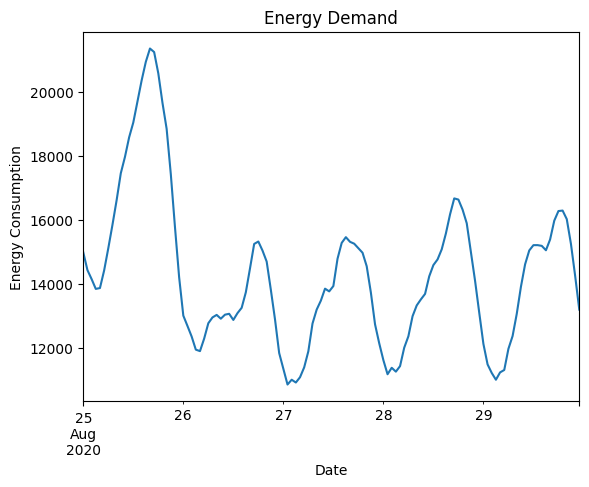

In [18]:
energy['MWh'].plot()
plt.title("Energy Demand")
plt.xlabel("Date")
plt.ylabel("Energy Consumption")
plt.show()